<h3 align='center'> <b> ĐỒ ÁN 1: DỰ ĐOÁN RỦI RO RỜI BỎ DỊCH VỤ CỦA KHÁCH HÀNG </b> </h3>

<h3 align='center'> <b> (CHURN RISK PREDICTION) </b> </32>

### **Thành viên nhóm:**

- ####  20280094 - Lê Hoài Thương
- ####  20280095 - Nguyễn Ngọc Anh Thy

# **I - Mô tả dữ liệu:**

- **customer_id**: Mã định danh duy nhất của khách hàng.


- **Name**: Đại diện cho tên của một khách hàng.

- **Age**: Tuổi của khách hàng.

- **security_no**: số bảo mật duy nhất được sử dụng để xác định khách hàng.

- **region_category**: khu vực mà khách hàng cư trú (*Village, City, Town,..*).

- **membership_category**: hạng mục thành viên của khách hàng đang sử dụng (*Platinum Membership, Premium Membership, No Membership,...*).

- **joining_date**: ngày khách hàng trở thành thành viên.

- **joined_through_referral**: cho biết khách hàng có tham gia bằng bất kỳ mã hoặc ID giới thiệu nào hay không (*Yes/No/?*).

- **referral_id**: ID của khách hàng đã giới thiệu khách hàng này.

- **preferred_offer_types**: loại ưu đãi mà khách hàng ưa thích (*Gift Vouchers/Coupons, Credit/Debit Card Offers*).

- **medium_of_operation**: phương tiện hoạt động mà khách hàng sử dụng cho các giao dịch (*Desktop, Smartphone, Both*).

- **internet_option**: loại dịch vụ internet mà khách hàng sử dụng (*Wi-Fi, Mobile_Data, Fiber_Optic,..*).

- **last_visit_time**: lần cuối khách hàng truy cập trang web.

- **days_since_last_login**: số ngày kể từ lần cuối khách hàng đăng nhập vào trang web.

- **avg_time_spent**: thời gian trung bình mà khách hàng dành cho trang web.

- **avg_transaction_value**: giá trị giao dịch trung bình của một khách hàng.

- **avg_frequency_login_days**: số lần khách hàng đã đăng nhập vào trang web.

- **point_in_wallet**: số điểm được trao cho khách hàng trên mỗi giao dịch.

- **used_special_discount**: cho biết khách hàng có sử dụng chiết khấu đặc biệt được cung cấp hay không (*Yes/No*).

- **offer_application_preference**: cho biết khách hàng có thích các ưu đãi hay không (*Yes/No*).

- **past_complaint**: cho biết khách hàng có đưa ra bất kỳ khiếu nại nào không (*Yes/No*).

- **complaint_status**: cho biết các khiếu nại của khách hàng đã được giải quyết hay chưa (*Solved, Unsolved, Solved in Follow-up*).

- **feedback**: phản hồi do khách hàng cung cấp.

- **churn_risk_score**: điểm số rủi ro rời bỏ dịch vụ của khách hàng nằm trong khoảng từ 1 đến 5.

# **II - Load dataset:**

In [1]:
# # !pip install -U pandas_profiling
# # !pip install -U pandas
# # !pip install -U xlrd
# # !pip install -U catboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

C:\Users\Thyaa\AppData\Local\Temp\ipykernel_22164\1057814030.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
path = "churn_rate_prediction.csv" # Path to your file
df = pd.read_csv(path)
df


customer_id              Name  age gender  \
0          fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1      fffe43004900440032003100300035003700       Traci Peery   32      F   
2          fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3      fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4      fffe43004900440031003900350030003600      Meghan Kosak   31      F   
...                                     ...               ...  ...    ...   
36987  fffe43004900440035003500390036003100          Cuc Tarr   46      F   
36988  fffe43004900440033003500380036003600    Jenni Stronach   29      F   
36989      fffe4300490044003500330034003100     Luciana Kinch   23      F   
36990  fffe43004900440031003200390039003000     Tawana Ardoin   53      M   
36991  fffe43004900440033003600340034003200  Verlene Beaulieu   35      M   

      security_no region_category  membership_category joining_date  \
0         XW0DQ7H         Village  Platinum Membership   2017-08-17   
1         5K0N3X1            City   Premium Membership   2017-08-28   
2         1F2TCL3            Town        No Membership   2016-11-11   
3         VJGJ33N            City        No Membership   2016-10-29   
4         SVZXCWB            City        No Membership   2017-09-12   
...           ...             ...                  ...          ...   
36987     6F51HFO             NaN     Basic Membership   2017-09-21   
36988     21KSM8Y            Town     Basic Membership   2016-06-27   
36989     XK1IM9H             NaN     Basic Membership   2016-09-11   
36990     K6VTP1Z         Village  Platinum Membership   2017-06-15   
36991     LBX0GLR            Town    Silver Membership   2015-10-23   

      joined_through_referral referral_id  ... avg_time_spent  \
0                          No    xxxxxxxx  ...     300.630000   
1                           ?    CID21329  ...     306.340000   
2                         Yes    CID12313  ...     516.160000   
3                         Yes     CID3793  ...      53.270000   
4                          No    xxxxxxxx  ...     113.130000   
...                       ...         ...  ...            ...   
36987                      No    xxxxxxxx  ...    -650.682759   
36988                      No    xxxxxxxx  ...    -638.123421   
36989                     Yes     CID3838  ...     154.940000   
36990                      No    xxxxxxxx  ...     482.610000   
36991                      No    xxxxxxxx  ...      79.180000   

      avg_transaction_value avg_frequency_login_days points_in_wallet  \
0                  53005.25                     17.0       781.750000   
1                  12838.38                     10.0              NaN   
2                  21027.00                     22.0       500.690000   
3                  25239.56                      6.0       567.660000   
4                  24483.66                     16.0       663.060000   
...                     ...                      ...              ...   
36987              27277.68                      6.0       639.510000   
36988              11069.71                     28.0       527.990000   
36989              38127.56                    Error       680.470000   
36990               2378.86                     20.0       197.264414   
36991               2189.68                    Error       719.970000   

       used_special_discount  offer_application_preference  past_complaint  \
0                        Yes                           Yes              No   
1                        Yes                            No             Yes   
2                         No                           Yes             Yes   
3                         No                           Yes             Yes   
4                         No                           Yes             Yes   
...                      ...                           ...             ...   
36987                     No                      

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [5]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [6]:
df.describe()

age  days_since_last_login  avg_time_spent  \
count  36992.000000           36992.000000    36992.000000   
mean      37.118161             -41.915576      243.472334   
std       15.867412             228.819900      398.289149   
min       10.000000            -999.000000    -2814.109110   
25%       23.000000               8.000000       60.102500   
50%       37.000000              12.000000      161.765000   
75%       51.000000              16.000000      356.515000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count           36992.000000      33549.000000      36992.000000  
mean            29271.194003        686.882199          3.463397  
std             19444.806226        194.063624          1.409661  
min               800.460000       -760.661236         -1.000000  
25%             14177.540000        616.150000          3.000000  
50%             27554.485000        697.620000          4.000000  
75%             40855.110000        763.950000          5.000000  
max             99914.050000       2069.069761          5.000000

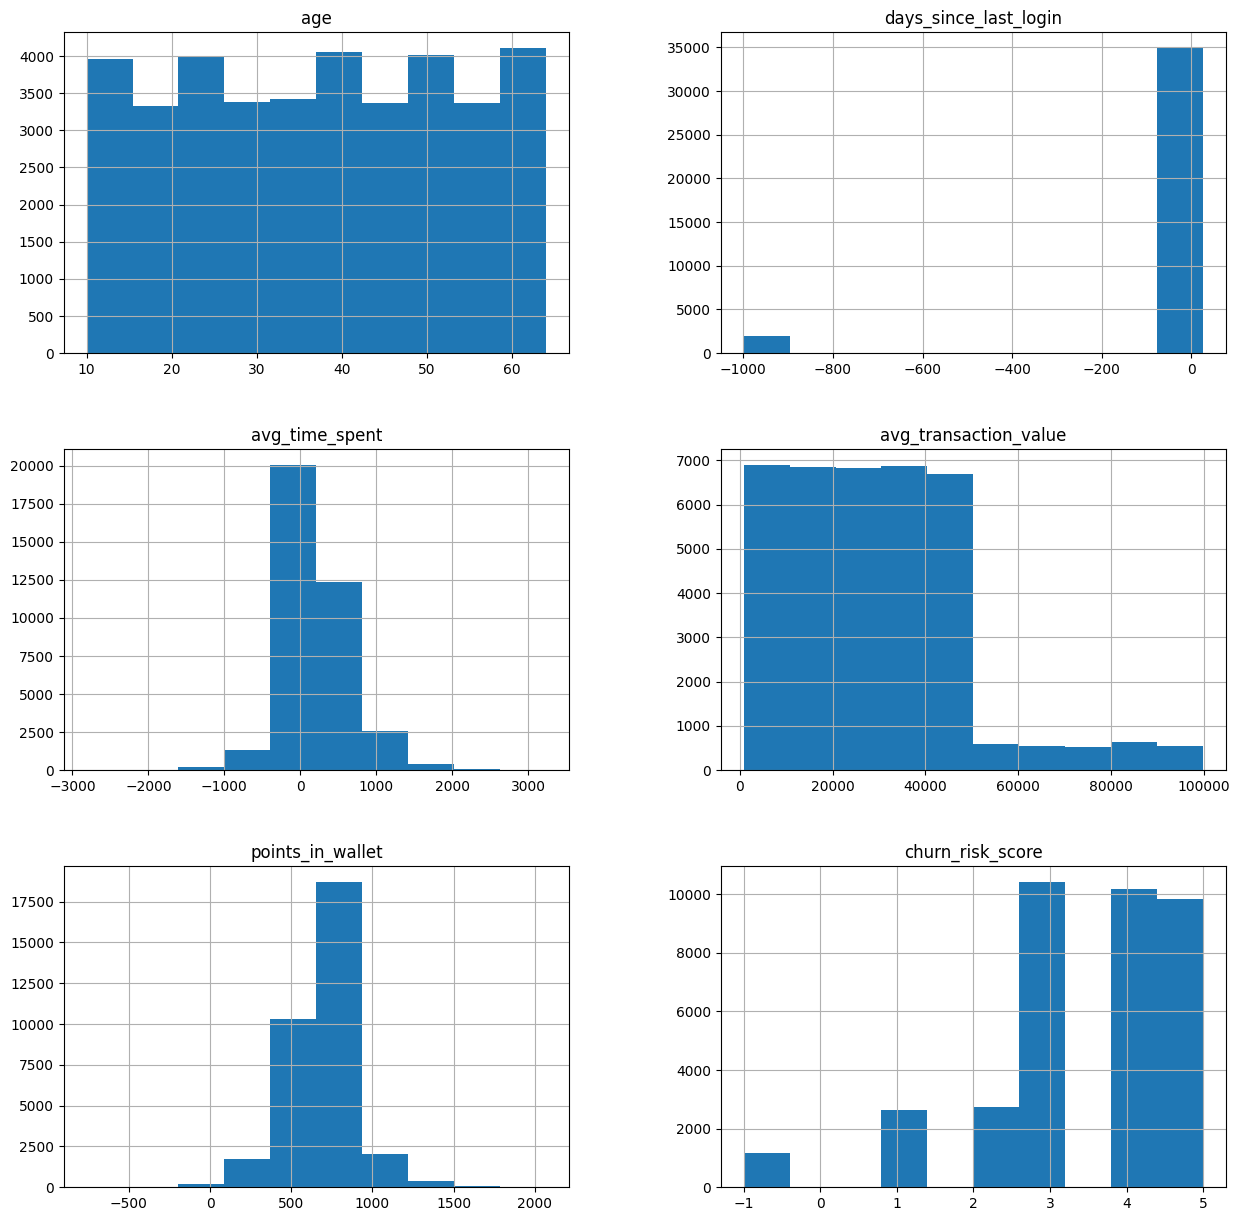

In [7]:
df.hist(figsize=(15, 15))
plt.show()

In [8]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **III - Exploratory Data Analysis:**

In [9]:
#Data Analysis
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]

print(numerical_cols)

['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']


<AxesSubplot: xlabel='count', ylabel='churn_risk_score'>

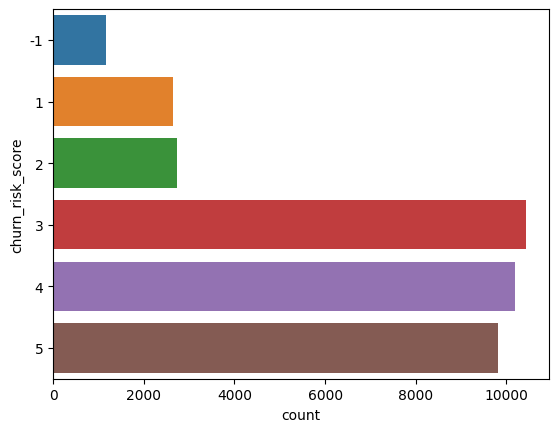

In [10]:
sns.countplot(y="churn_risk_score", data=df)

C:\Users\Thyaa\AppData\Local\Temp\ipykernel_22164\3943477899.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool)


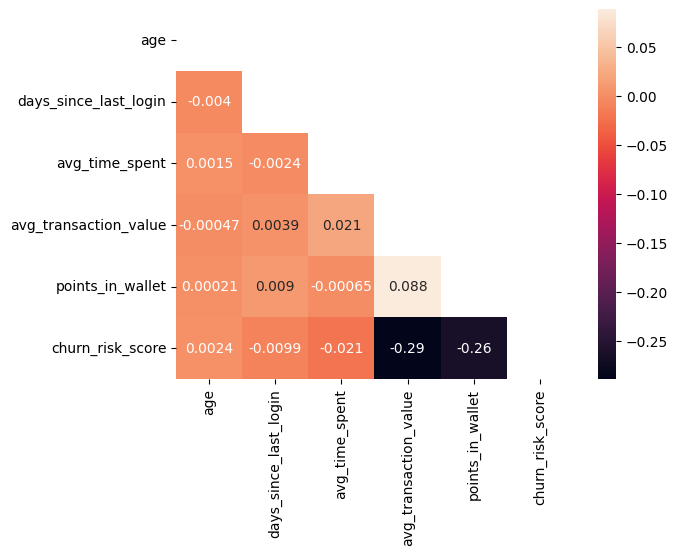

In [11]:
corr = df[numerical_cols].corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

# **IV - Preprocessing:**

In [12]:
# df_num = df[numerical_cols]

In [13]:
def preprocessing_data(df):
    df.dropna(inplace=True)
    return df
data = preprocessing_data(df.copy())

In [14]:
data.index = range(0,data.shape[0])

# Removing all the rows having 'churn_risk_score' == -1
l5 = np.where(data['churn_risk_score'] == -1)
data.drop(l5[0],inplace=True)

data['churn_risk_score'].value_counts()

churn_risk_score
3    7998
4    7814
5    7499
2    2116
1    2045
Name: count, dtype: int64

In [15]:
# Heatmap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

def apply_feature_engineering(data):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    encoder = LabelEncoder()
    for col in categorical_cols:
      data.loc[:, col] = encoder.fit_transform(data[col])

    return data

data = apply_feature_engineering(data)
data

customer_id   Name  age gender security_no region_category  \
0           23901  21354   18      0       25820               2   
1            4297  18865   44      0        1095               1   
2           24023   7825   37      1       24101               0   
3            4414  18412   31      0       22106               0   
4           25387  15262   13      1       19739               0   
...           ...    ...  ...    ...         ...             ...   
28368       26602   6787   12      0       13003               2   
28369       18359  17533   27      1        6838               1   
28370       12194  12139   29      0        1580               1   
28371        1393  25553   53      1       15588               2   
28372       12449  26495   35      1       16397               1   

      membership_category joining_date joined_through_referral referral_id  \
0                       3          959                       1        9373   
1                       2          680                       2         393   
2                       2          667                       2        4530   
3                       2          985                       1        9373   
4                       1          372                       1        9373   
...                   ...          ...                     ...         ...   
28368                   4          663                       1        9373   
28369                   3          249                       2         939   
28370                   0          543                       1        9373   
28371                   3          896                       1        9373   
28372                   5          295                       1        9373   

       ... avg_time_spent avg_transaction_value avg_frequency_login_days  \
0      ...     300.630000              53005.25                      548   
1      ...     516.160000              21027.00                      575   
2      ...      53.270000              25239.56                     1200   
3      ...     113.130000              24483.66                      546   
4      ...     433.620000              13884.77                      578   
...    ...            ...                   ...                      ...   
28368  ...     418.380000              56397.21                     1208   
28369  ...     135.830000               8225.68                      546   
28370  ...    -638.123421              11069.71                      599   
28371  ...     482.610000               2378.86                      571   
28372  ...      79.180000               2189.68                     1212   

      points_in_wallet  used_special_discount  offer_application_preference  \
0           781.750000                      1                             1   
1           500.690000                      0                             1   
2           567.660000                      0                             1   
3           663.060000                      0                             1   
4           722.270000                      1                             0   
...                ...                    ...                           ...   
28368       725.890000                      1                             1   
28369       748.570000                      1                             0   
28370       527.990000                      1                             0   
28371       197.264414                      1                             1   
28372       719.970000                      1                             0   

       past_complaint complaint_status  feedback churn_risk_score  
0                   0                1         4                2  
1                   1                3         3                5  
2                   1                4         3                5  
3                   1                2         3                5  
4                   1                4         0  

In [16]:
processed_df = apply_feature_engineering(data.copy())
processed_df.head()

customer_id   Name  age gender security_no region_category  \
0       23901  21354   18      0       25820               2   
1        4297  18865   44      0        1095               1   
2       24023   7825   37      1       24101               0   
3        4414  18412   31      0       22106               0   
4       25387  15262   13      1       19739               0   

  membership_category joining_date joined_through_referral referral_id  ...  \
0                   3          959                       1        9373  ...   
1                   2          680                       2         393  ...   
2                   2          667                       2        4530  ...   
3                   2          985                       1        9373  ...   
4                   1          372                       1        9373  ...   

  avg_time_spent avg_transaction_value avg_frequency_login_days  \
0         300.63              53005.25                      548   
1         516.16              21027.00                      575   
2          53.27              25239.56                     1200   
3         113.13              24483.66                      546   
4         433.62              13884.77                      578   

  points_in_wallet  used_special_discount  offer_application_preference  \
0           781.75                      1                             1   
1           500.69                      0                             1   
2           567.66                      0                             1   
3           663.06                      0                             1   
4           722.27                      1                             0   

   past_complaint complaint_status  feedback churn_risk_score  
0               0                1         4                2  
1               1                3         3                5  
2               1                4         3                5  
3               1                2         3                5  
4               1                4         0                3  

[5 rows x 25 columns]

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.values)

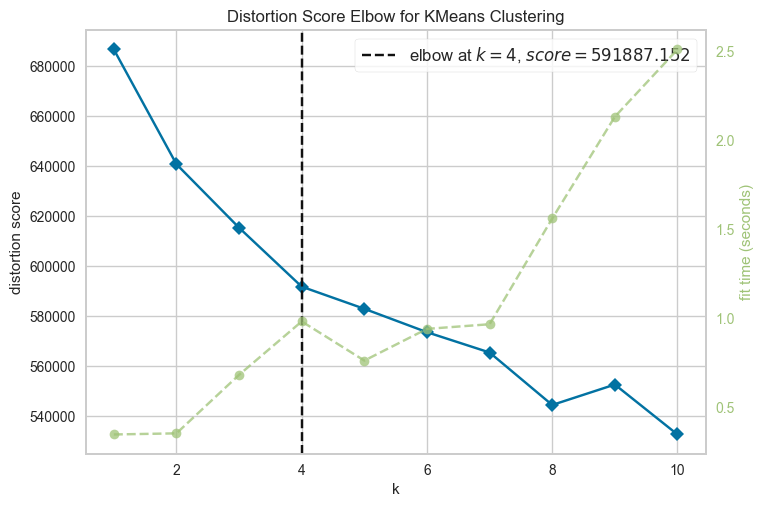

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Load your data into a DataFrame (assuming 'df' is your DataFrame)
# Replace NaN values with a placeholder or appropriate imputation strategy
imputer = SimpleImputer(strategy="mean")
df_imputed = imputer.fit_transform(data)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)

# Apply the KElbowVisualizer
elbow_method = KElbowVisualizer(KMeans(), k=(1, 11))
elbow_method.fit(scaled_data)
elbow_method.show()


In [19]:
kmeans_model = KMeans(n_clusters= 6)
kmeans_model.fit(scaled_data)

KMeans(n_clusters=6)

In [20]:
labels = kmeans_model.labels_
labels

array([1, 3, 3, ..., 2, 2, 2])

In [21]:
#Để dự đoán ra label của tập testing (ta giả sử là scaled_data) ta dùng .predict
kmeans_model.predict(scaled_data)

array([1, 3, 3, ..., 2, 2, 2])

In [22]:
#Để xuất ra các centroids ta có thể dùng .cluster_centers_
kmeans_model.cluster_centers_.shape

(6, 25)

In [23]:
labels.max()

5

In [24]:
df_cluster = pd.concat([data, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

customer_id   Name   age gender security_no region_category  \
0       23901  21354  18.0      0       25820               2   
1        4297  18865  44.0      0        1095               1   
2       24023   7825  37.0      1       24101               0   
3        4414  18412  31.0      0       22106               0   
4       25387  15262  13.0      1       19739               0   

  membership_category joining_date joined_through_referral referral_id  ...  \
0                   3          959                       1        9373  ...   
1                   2          680                       2         393  ...   
2                   2          667                       2        4530  ...   
3                   2          985                       1        9373  ...   
4                   1          372                       1        9373  ...   

  avg_transaction_value avg_frequency_login_days points_in_wallet  \
0              53005.25                      548           781.75   
1              21027.00                      575           500.69   
2              25239.56                     1200           567.66   
3              24483.66                      546           663.06   
4              13884.77                      578           722.27   

  used_special_discount  offer_application_preference  past_complaint  \
0                     1                             1               0   
1                     0                             1               1   
2                     0                             1               1   
3                     0                             1               1   
4                     1                             0               1   

   complaint_status feedback  churn_risk_score cluster  
0                 1        4               2.0     1.0  
1                 3        3               5.0     3.0  
2                 4        3               5.0     3.0  
3                 2        3               5.0     4.0  
4                 4        0               3.0     0.0  

[5 rows x 26 columns]

# **V - Feature Engineering:**

## PCA

In [25]:
from sklearn.decomposition import PCA #Khai báo thư viện PCA
pca = PCA(n_components=len(data.columns)) #khai báo
pca.fit(scaled_data)

PCA(n_components=25)

In [26]:
#cho ta biết được các thành phần phủ được bao nhiêu lượng thông tin của data gốc
pca.explained_variance_ratio_*100

array([7.87506026, 7.2380446 , 6.0611945 , 5.23800112, 4.32377236,
       4.15427741, 4.11950094, 4.05492526, 4.04722759, 4.03156387,
       4.02468881, 3.99947947, 3.98478453, 3.96479662, 3.93344301,
       3.93064819, 3.88471774, 3.86286731, 3.50146918, 3.33704403,
       3.14504205, 3.02179398, 1.93308081, 1.64849031, 0.68408604])

## 3 dimension PCA

In [27]:
pca = PCA(n_components=3) #dùng pca 3 thành phần
pca_df = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca_1", "pca_2", "pca_3"])#tạo ra dataframe với 3 thành phàn là pca1, pca2, và pca3

In [28]:
pca_df

pca_1     pca_2     pca_3
0      2.012866  0.285999 -1.021962
1     -1.316065 -1.607085  1.399554
2     -1.063776 -1.552473  2.076574
3     -0.746441 -1.643702  0.761146
4     -1.010155  1.345046  2.061783
...         ...       ...       ...
27467  2.113224  0.553785  2.159220
27468 -0.613585  1.437574 -0.953201
27469 -2.500505  0.850014 -1.396762
27470 -1.169391 -0.359408 -1.286481
27471  1.241308  1.687731 -0.974717

[27472 rows x 3 columns]

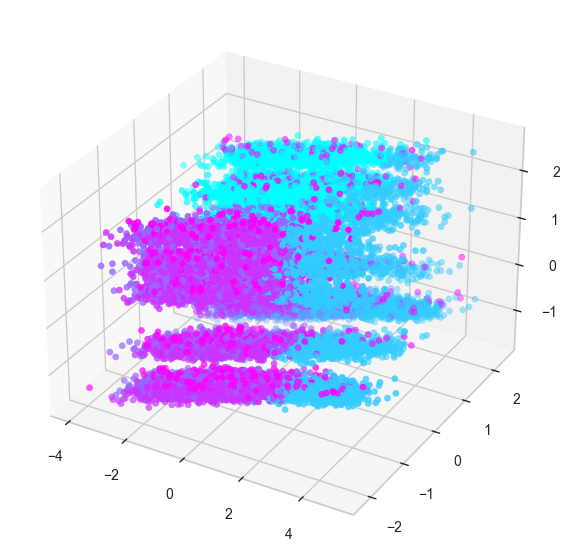

In [29]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca_df.pca_1, pca_df.pca_2, pca_df.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

In [30]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_df = pd.DataFrame(pca.transform(scaled_data), columns=["pca1", "pca2"])

In [31]:
pca_df.head()

pca1      pca2
0  2.049674  0.324099
1 -1.287887 -1.562034
2 -1.053876 -1.528241
3 -0.708203 -1.552981
4 -1.010346  1.299866

In [32]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0  2.049674  0.324099        1
1 -1.287887 -1.562034        3
2 -1.053876 -1.528241        3
3 -0.708203 -1.552981        4
4 -1.010346  1.299866        0

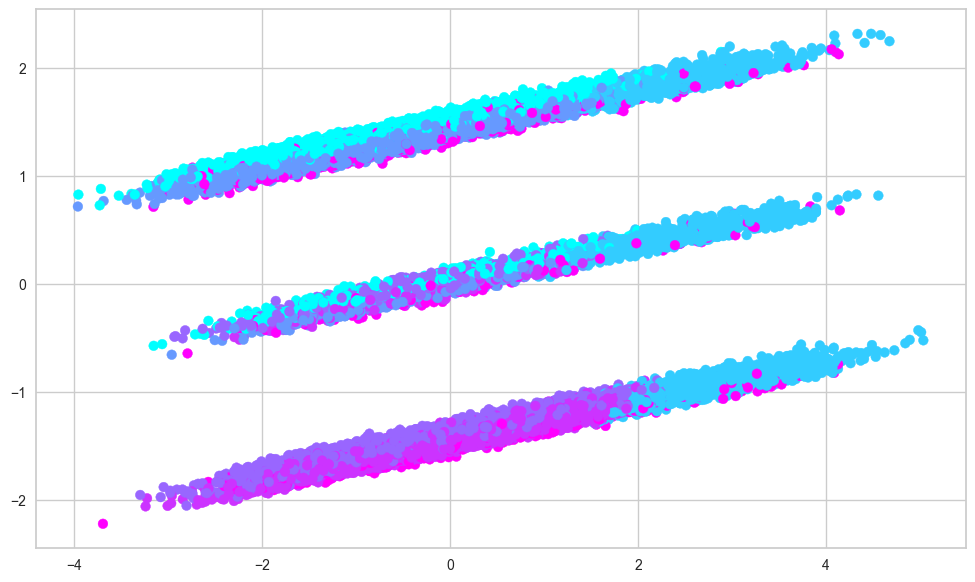

In [33]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_df.pca1, pca_df.pca2, c=kmeans_model.labels_, cmap="cool")
plt.show()

C:\Users\Thyaa\AppData\Local\Temp\ipykernel_22164\3073008628.py:2: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,


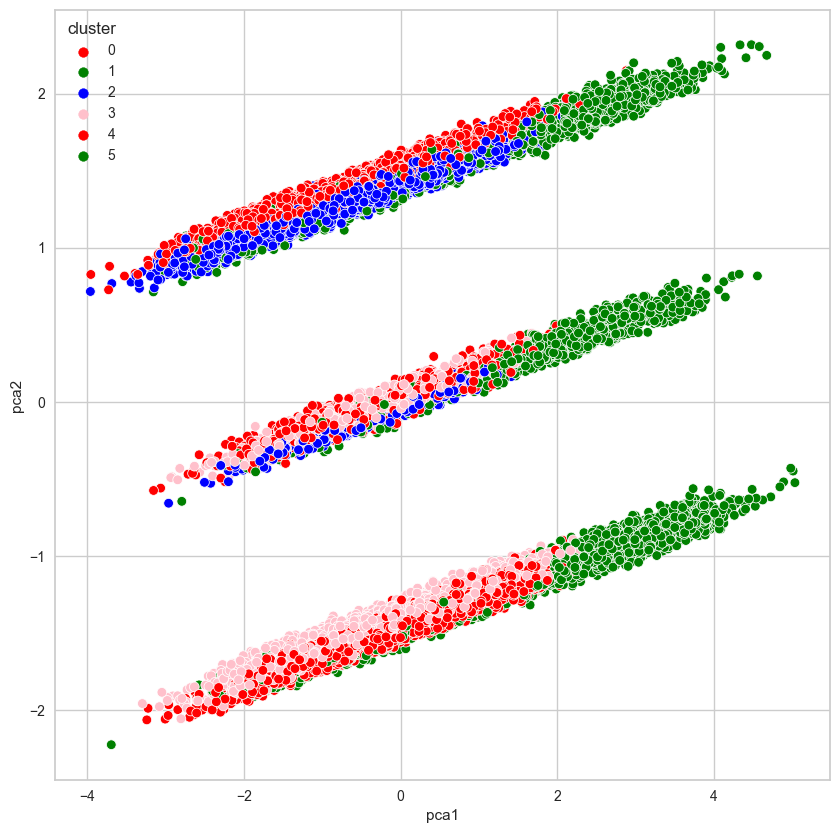

In [34]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,
                     palette = ['red', 'green', 'blue', 'pink'])
plt.show()

In [35]:
def prepare_X_y(data):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # feature_names = df.columns.tolist()
    # feature_names.remove("churn_risk_score")
    # # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    # X = df[feature_names].values
    # y = df.churn_risk_score.values
    X = data.drop(['churn_risk_score'],axis=1).values
    y = data['churn_risk_score'].values # Todo: Select label
    return X, y

X, y = prepare_X_y(processed_df)

# **VI - Apply machine learning model:**

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def calculate_performance(y_true, y_pred):

    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true , y_pred, average='weighted'))
    print("Recall: ", recall_score(y_true , y_pred, average='weighted'))
    print("F1: ", f1_score(y_true , y_pred, average='weighted'))

    print("Confusion matrix: \n", confusion_matrix(y_true , y_pred))

# pred = naive_model.predict(testX)
# score = calculate_performance(testY, pred)
# print("Performance score:", score)

## Train-test split:

In [37]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Logistic Regression


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Create the LogisticRegression classifier
clf = LogisticRegression()
# Define the pipeline with imputation, scaling, and the classifier
log_pipe = Pipeline(steps=[ # Handle missing values
    ("scaler", StandardScaler()),  # Scale the features
    ("logreg", clf)  # LogisticRegression
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'logreg__C': [0.1, 1.0, 10.0],
    'logreg__solver': ['liblinear', 'lbfgs', 'sag', 'saga']
}

# Perform grid search with cross-validation
log_model = GridSearchCV(log_pipe, param_grid, scoring="f1_macro", cv=5)
log_model.fit(X_train, y_train)

# Print the best parameter and score
pred = log_model.predict(X_test)
print("Best parameter (CV score=%0.3f):" % log_model.best_score_)
print(log_model.best_params_)
print(classification_report(y_test, pred))

Best parameter (CV score=0.436):
{'logreg__C': 0.1, 'logreg__solver': 'saga'}
              precision    recall  f1-score   support

           1       0.45      0.30      0.36      1444
           2       0.42      0.38      0.40      1466
           3       0.60      0.65      0.62      5661
           4       0.30      0.26      0.28      5441
           5       0.47      0.55      0.50      5219

    accuracy                           0.46     19231
   macro avg       0.45      0.43      0.43     19231
weighted avg       0.45      0.46      0.46     19231



In [39]:
calculate_performance(y_test, pred)


Accuracy:  0.4640424314908221
Precision:  0.4537781049739763
Recall:  0.4640424314908221
F1:  0.45625292159253505
Confusion matrix: 
 [[ 432  398  367  163   84]
 [ 280  550  419  128   89]
 [ 122  222 3682  978  657]
 [  81   96 1447 1415 2402]
 [  52   32  220 2070 2845]]


## Naive Bayes Classification

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Khởi tạo pipeline
nb_pipe = Pipeline([
    ('scaler', StandardScaler()), # Tiêu chuẩn hóa dữ liệu
    ("imputer", SimpleImputer()),   
    ('naive_bayes', BernoulliNB()),  # Mô hình Naive Bayes
])

# Đào tạo pipeline trên tập huấn luyện
nb_pipe.fit(X_train, y_train)

pred = nb_pipe.predict(X_test)

# Đánh giá độ chính xác của mô hình
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.35      0.29      0.31      1444
           2       0.38      0.46      0.42      1466
           3       0.73      0.65      0.69      5661
           4       0.47      0.34      0.39      5441
           5       0.60      0.85      0.70      5219

    accuracy                           0.57     19231
   macro avg       0.51      0.52      0.50     19231
weighted avg       0.57      0.57      0.56     19231



In [41]:
calculate_performance(y_test, pred)

Accuracy:  0.5741771098746815
Precision:  0.5676536345273897
Recall:  0.5741771098746815
F1:  0.5612405990992874
Confusion matrix: 
 [[ 416  631  241  119   37]
 [ 373  671  291  102   29]
 [ 219  345 3703 1278  116]
 [ 132   86  670 1835 2718]
 [  61   19  142  580 4417]]


## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Create the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Define the pipeline with imputation and the classifier
dt_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer()),  # Handle missing values
    ("tree", clf)  # DecisionTreeClassifier
])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'tree__criterion': ["gini", "entropy", "log_loss"]
}

# Perform grid search with cross-validation
dt_model = GridSearchCV(dt_pipe, param_grid, scoring="recall", n_jobs=2)
dt_model.fit(X_train, y_train)

# Print the best parameter and score
pred = dt_model.predict(X_test)
print("Best parameter (CV score=%0.3f):" % dt_model.best_score_)
print(dt_model.best_params_)
print(classification_report(y_test, pred))


C:\Users\Thyaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Best parameter (CV score=nan):
{'tree__criterion': 'gini'}
              precision    recall  f1-score   support

           1       0.75      0.74      0.74      1444
           2       0.74      0.75      0.75      1466
           3       0.92      0.91      0.91      5661
           4       0.67      0.68      0.68      5441
           5       0.74      0.74      0.74      5219

    accuracy                           0.77     19231
   macro avg       0.76      0.76      0.76     19231
weighted avg       0.78      0.77      0.77     19231



In [43]:
calculate_performance(y_test, pred)

Accuracy:  0.7741147106234725
Precision:  0.7750393139511447
Recall:  0.7741147106234725
F1:  0.774554556321485
Confusion matrix: 
 [[1063  351   12    6   12]
 [ 334 1097   15   16    4]
 [  13   17 5138  470   23]
 [   8   12  410 3708 1303]
 [   8    0   15 1315 3881]]


## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Create the RandomForestClassifier
clf = RandomForestClassifier()

# Define the pipeline with scaling and the classifier
pipe_rf = Pipeline(steps=[
    ("scaler", StandardScaler()),  # Standardize features
    ("rf", clf)  # RandomForestClassifier
])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'rf__n_estimators': [100, 200, 500],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10],
}

rf_model = GridSearchCV(pipe_rf, param_grid, scoring="recall", n_jobs=2)
rf_model.fit(X_train, y_train)

# Print the best parameter and score
pred = rf_model.predict(X_test)
print("Best parameter (CV score=%0.3f):" % rf_model.best_score_)
print(rf_model.best_params_)
print(classification_report(y_test, pred))


C:\Users\Thyaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameter (CV score=nan):
{'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
              precision    recall  f1-score   support

           1       0.78      0.70      0.74      1444
           2       0.74      0.78      0.76      1466
           3       0.89      0.95      0.92      5661
           4       0.69      0.66      0.67      5441
           5       0.74      0.74      0.74      5219

    accuracy                           0.78     19231
   macro avg       0.77      0.76      0.77     19231
weighted avg       0.77      0.78      0.78     19231



In [45]:
calculate_performance(y_test, pred)

Accuracy:  0.7779106650720191
Precision:  0.774729860362652
Recall:  0.7779106650720191
F1:  0.7757061543349977
Confusion matrix: 
 [[1006  409   14    5   10]
 [ 281 1143   25   15    2]
 [   2    0 5362  238   59]
 [   2    0  603 3566 1270]
 [   0    0   11 1325 3883]]


## XGBoost

In [46]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7, 9],
              'learning_rate': [0.01, 0.1, 1]}

search = GridSearchCV(xgb_model, param_grid, cv = 5, scoring='neg_mean_absolute_error')
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
pred = search.predict(X_test)

mae = mean_absolute_error(y_test, pred)
print(f"Mean absolute error: {mae}")

Best parameter (CV score=-0.250):
{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 50}
Mean absolute error: 0.23844639589129332


## Suport Vector Machine (SVM)

In [47]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Create the SVC classifier
clf = SVC()

# Define the pipeline with imputation, scaling, and the classifier
pipe_svm = Pipeline(steps=[  # Handle missing values
    ("scaler", StandardScaler()),  # Standardize features
    ("svm", clf)  # SVC classifier
])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'svm__C': [1],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale'],
}

svm_model = GridSearchCV(pipe_svm, param_grid, scoring="recall", n_jobs=2)
svm_model.fit(X_train, y_train)

# Print the best parameter and score
pred = svm_model.predict(X_test)
print("Best parameter (CV score=%0.3f):" % svm_model.best_score_)
print(svm_model.best_params_)
print(classification_report(y_test, pred))


C:\Users\Thyaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(


Best parameter (CV score=nan):
{'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
              precision    recall  f1-score   support

           1       0.50      0.27      0.35      1444
           2       0.47      0.37      0.41      1466
           3       0.60      0.69      0.64      5661
           4       0.41      0.10      0.16      5441
           5       0.47      0.85      0.60      5219

    accuracy                           0.51     19231
   macro avg       0.49      0.46      0.43     19231
weighted avg       0.49      0.51      0.46     19231



In [48]:
calculate_performance(y_test, pred)

Accuracy:  0.5099578805054339
Precision:  0.4927248192717215
Recall:  0.5099578805054339
F1:  0.4566707703663317
Confusion matrix: 
 [[ 392  390  399   65  198]
 [ 247  538  463   41  177]
 [  61  130 3893  224 1353]
 [  53   64 1485  559 3280]
 [  35   33  252  474 4425]]


## Multilayer perceptron (MLP)

In [49]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create the MLPClassifier
clf_mlp = MLPClassifier()

# Define the pipeline with imputation and the classifier
pipe_mlp = Pipeline(steps=[
    ("imputer", SimpleImputer()),  # Handle missing values
    ("mlp", clf_mlp)  # MLPClassifier
])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid_mlp = {
    'mlp__hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],
    'mlp__activation': ["relu", "tanh", "logistic"],
    'mlp__alpha': [0.0001, 0.001, 0.01]
}

search_mlp = GridSearchCV(pipe_mlp, param_grid_mlp, scoring="recall", n_jobs=2)
search_mlp.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_mlp.best_score_)
print(search_mlp.best_params_)

predicted_label_mlp = search_mlp.predict(X_test)
print(classification_report(y_test, predicted_label_mlp))
print(f1_score(y_test, predicted_label_mlp, average='macro'))


C:\Users\Thyaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameter (CV score=nan):
{'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100,)}
              precision    recall  f1-score   support

           1       0.04      0.01      0.01      1444
           2       0.30      0.45      0.36      1466
           3       0.44      0.08      0.13      5661
           4       0.30      0.74      0.43      5441
           5       0.40      0.18      0.25      5219

    accuracy                           0.32     19231
   macro avg       0.30      0.29      0.24     19231
weighted avg       0.35      0.32      0.25     19231

0.235069234792974


### *Conclusion:*
##### Dựa trên các chỉ số hiệu suất, thuật toán Random Forest và Decision Tree có điểm số cao nhất.

##### Đối với bài toán này chúng ta sẽ quan tâm đến khả năng xác định các trường hợp khách hàng thực sự sắp rời bỏ dịch vụ so với tổng số khách hàng thực tế là rủi ro rời bỏ dịch vụ, việc bắt kịp các trường hợp này là quan trọng để có thể đưa ra các biện pháp phù hợp nhằm giữ chân khách hàng và tránh rủi ro mất đi doanh thu. . Vì theo Forbes, để có được khách hàng mới cần nhiều tiền hơn (gấp 5 lần) so với việc giữ những khách hàng bạn đã có. Nên chúng ta có thể quan tâm đặc biệt với chỉ số recall ở score 4 và 5.

##### churn_risk_score là chỉ số quan trọng. Việc xác định những khách hàng không hài lòng có thể giúp các nhà quản lý xác định các điểm yếu của sản phẩm hoặc kế hoạch định giá, các vấn đề về hoạt động, cũng như sở thích và kỳ vọng của khách hàng. Khi những điều đó, sẽ dễ dàng có các cách chủ động hơn để giảm tỷ lệ rời bỏ.


